In [2]:
#connecting drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import sys
import time
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.python.keras.utils import to_categorical

# specifically for cnn
from tensorflow.python.keras.layers import Dropout, Flatten,Activation, GlobalAverage2D
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.python.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.applications import VGG19, ResNet50, InceptionV3
 
import tensorflow as tf
import random as rn
from tensorflow.python.keras.utils import np_utils
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
sys.version

'3.6.8 (default, Jan 14 2019, 11:02:34) \n[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]'

In [0]:
#data preparation
#takes awhile to run

#directory path setup to flowers folders 
#tulip path
tulip_dataset_dir = '/content/gdrive/My Drive/flower_photos/flower_photos/tulips'
#daisy path
daisy_dataset_dir = '/content/gdrive/My Drive/flower_photos/flower_photos/daisy'
#rose path
rose_dataset_dir = '/content/gdrive/My Drive/flower_photos/flower_photos/roses'
#sunflower path
sunflower_dataset_dir = '/content/gdrive/My Drive/flower_photos/flower_photos/sunflowers'
#dandelion path
dandelion_dataset_dir = '/content/gdrive/My Drive/flower_photos/flower_photos/dandelion'

#base directory path to flower folder, create path if it doesn't exist
base_dir = '/content/gdrive/My Drive/flower_photos/flower_photos'
if not os.path.exists(base_dir):
  os.mkdir(base_dir)

#labels of the flowers different categories  
labels = ['tulip', 'rose', 'dandelion', 'daisy', 'sunflower']  

#train directory path to training images dataset, create if it doesn't  exist
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)

#validation directory path to validation images dataset, create if it doesn't  exist  
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

#test directory path to test images dataest, create if it doesn't  exist  
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

#train tulip directory path to training tulips image dataset, create if it doesn't exist  
train_tulip_dir = os.path.join(train_dir, 'tulips')
if not os.path.exists(train_tulip_dir):
  os.mkdir(train_tulip_dir)  

#train rose directory path to training rose image dataset, create if it doesn't exist    
train_rose_dir = os.path.join(train_dir, 'roses')
if not os.path.exists(train_rose_dir):
  os.mkdir(train_rose_dir)    

#train dandelion directory path to training dandelion image dataset, create if it doesn't exist    
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
if not os.path.exists(train_dandelion_dir):
  os.mkdir(train_dandelion_dir) 
  
#train daisy directory path to training daisy image dataset, create if it doesn't exist    
train_daisy_dir = os.path.join(train_dir, 'daisy')
if not os.path.exists(train_daisy_dir):
  os.mkdir(train_daisy_dir)

#train sunflower directory path to training sunflower image dataset, create if it doesn't exist    
train_sunflower_dir = os.path.join(train_dir, 'sunflowers')
if not os.path.exists(train_sunflower_dir):
  os.mkdir(train_sunflower_dir)

#validation tulip directory path to validation tulip image dataset, create if it doesn't exist    
validation_tulip_dir = os.path.join(validation_dir, 'tulips')
if not os.path.exists(validation_tulip_dir):
  os.mkdir(validation_tulip_dir)  

#validation rose directory path to validation rose image dataset, create if it doesn't exist  
validation_rose_dir = os.path.join(validation_dir, 'roses')
if not os.path.exists(validation_rose_dir):
  os.mkdir(validation_rose_dir)    

#validation dandelion directory path to validation dandelion image dataset, create if it doesn't exist  
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
if not os.path.exists(validation_dandelion_dir):
  os.mkdir(validation_dandelion_dir) 
  
#validation daisy directory path to validation daisy image dataset, create if it doesn't exist  
validation_daisy_dir = os.path.join(validation_dir, 'daisy')
if not os.path.exists(validation_daisy_dir):
  os.mkdir(validation_daisy_dir)
  
#validation sunflower directory path to validation sunflower image dataset, create if it doesn't exist  
validation_sunflower_dir = os.path.join(validation_dir, 'sunflowers')
if not os.path.exists(validation_sunflower_dir):
  os.mkdir(validation_sunflower_dir)

#test tulip directory path to test tulip image dataset, create if it doesn't exist    
test_tulip_dir = os.path.join(test_dir, 'tulips')
if not os.path.exists(test_tulip_dir):
  os.mkdir(test_tulip_dir)  

#test rose directory path to validation rose image dataset, create if it doesn't exist  
test_rose_dir = os.path.join(test_dir, 'roses')
if not os.path.exists(test_rose_dir):
  os.mkdir(test_rose_dir)    

#validation dandelion directory path to validation dandelion image dataset, create if it doesn't exist  
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
if not os.path.exists(test_dandelion_dir):
  os.mkdir(test_dandelion_dir) 
  
#validation daisy directory path to validation daisy image dataset, create if it doesn't exist  
test_daisy_dir = os.path.join(test_dir, 'daisy')
if not os.path.exists(test_daisy_dir):
  os.mkdir(test_daisy_dir)
  
#validation sunflower directory path to validation sunflower image dataset, create if it doesn't exist  
test_sunflower_dir = os.path.join(test_dir, 'sunflowers')
if not os.path.exists(test_sunflower_dir):
  os.mkdir(test_sunflower_dir)
    

#renaming the images 
#counter for images
i = 0  
#loop to rename tulip photos
for files in os.listdir(tulip_dataset_dir):
  #new file name
  dst ="tulip" + str(i) + ".jpg"
  #original path to file
  src = tulip_dataset_dir + '/'+  files
  #new path to the file
  dst = tulip_dataset_dir + '/'+  dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst) 
  #increment to next image
  i += 1

#counter for images  
i = 0  
#loop to rename rose photos
for files in os.listdir(rose_dataset_dir):
  #new file name
  dst ="rose" + str(i) + ".jpg"
  #original path to file
  src = rose_dataset_dir + '/' + files 
  #new path to file
  dst = rose_dataset_dir + '/' + dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst) 
  #increment to next image
  i += 1

#counter for images  
i = 0  
#loop to rename daisy images 
for files in os.listdir(daisy_dataset_dir):
  #new name for file
  dst ="daisy" + str(i) + ".jpg"
  #original file path
  src = daisy_dataset_dir + '/' + files 
  #new file path
  dst = daisy_dataset_dir + '/' + dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)
  #increment to next image
  i += 1

#counter for images
i = 0    
#loop to rename sumflower images
for files in os.listdir(sunflower_dataset_dir):
  #new name for file
  dst ="sunflower" + str(i) + ".jpg"
  #original file path 
  src = sunflower_dataset_dir + '/' + files 
  #new fiel path
  dst = sunflower_dataset_dir + '/'  + dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)
  #increment to next image
  i += 1

#counter for images  
i = 0  
#loop to rename dandelion images
for files in os.listdir(dandelion_dataset_dir):
  #new file name
  dst ="dandelion" + str(i) + ".jpg"
  #original file path
  src = dandelion_dataset_dir + '/' + files 
  #new file path
  dst = dandelion_dataset_dir + '/' + dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst) 
  #increment to next image
  i += 1
    
#puting images into train folder
#list of tulip images 0-100
fnames =['tulip{}.jpg'.format(i) for i in range(150)]
#loop to put images in train folder
for fname in fnames:
  #original directory joining tulip images 
  src = os.path.join(tulip_dataset_dir, fname)
  #train directory joining to tulip images
  dst = os.path.join(train_tulip_dir, fname)
  #copy images in original directory to train directory
  shutil.copyfile(src, dst)

#list of tulip images 200-250  
fnames =['tulip{}.jpg'.format(i) for i in range(150,250)]
#loop to put images in validation folder
for fname in fnames:
  #original directory joining tulip images
  src = os.path.join(tulip_dataset_dir, fname)
  #validation directory joining to tulip images
  dst = os.path.join(validation_tulip_dir, fname)
  #copy images in original directory to validation directory
  shutil.copyfile(src, dst)  

#list of tulip images 250-300  
fnames =['tulip{}.jpg'.format(i) for i in range(250,350)]
#loop to put images in test folder
for fname in fnames:
  #original directory joining tulip images
  src = os.path.join(tulip_dataset_dir, fname)
  #test directory joining to tulip images
  dst = os.path.join(test_tulip_dir, fname)
  #copy images in original directory to test directory
  shutil.copyfile(src, dst) 

#list of rose images 0-100  
fnames =['rose{}.jpg'.format(i) for i in range(150)]
#loop to put images in train folder
for fname in fnames:
  #orignial directory joining rose images
  src = os.path.join(rose_dataset_dir, fname)
  #train directory joining to rose images
  dst = os.path.join(train_rose_dir, fname)
  #copy images in original directory to train directory
  shutil.copyfile(src, dst)

#list of rose images 200-250  
fnames =['rose{}.jpg'.format(i) for i in range(150,250)]
#loop to put images in validation folder
for fname in fnames:
  #original directory joining rose images
  src = os.path.join(rose_dataset_dir, fname)
  #validation directory joining rose images
  dst = os.path.join(validation_rose_dir, fname)
  #copy images in original to validation directory
  shutil.copyfile(src, dst)  

#list of rose images 250-300  
fnames =['rose{}.jpg'.format(i) for i in range(250,350)]
#lopp to put iamges in test folder
for fname in fnames:
  #original directory joining rose images
  src = os.path.join(rose_dataset_dir, fname)
  #test directory joining rose images
  dst = os.path.join(test_rose_dir, fname)
  #copy images in original to test directory
  shutil.copyfile(src, dst)   
  
#list of dandelion images 0 -100
fnames =['dandelion{}.jpg'.format(i) for i in range(150)]
#loop to put images in train folder
for fname in fnames:
  #original directory joining dandelion images
  src = os.path.join(dandelion_dataset_dir, fname)
  #train directory joining dandelion images
  dst = os.path.join(train_dandelion_dir, fname)
  #copy images in original to train directory
  shutil.copyfile(src, dst)
  
#list of dandelion images 200-250  
fnames =['dandelion{}.jpg'.format(i) for i in range(150,250)]
#loop to put images in validation folder
for fname in fnames:
  #original directory joining dandelion images
  src = os.path.join(dandelion_dataset_dir, fname)
  #validation directory joining dandelion images
  dst = os.path.join(validation_dandelion_dir, fname)
  #copy images in original to validation directory
  shutil.copyfile(src, dst)  

#list of dandelion images 250-300  
fnames =['dandelion{}.jpg'.format(i) for i in range(250,350)]
#loop to put images in test folder
for fname in fnames:
  #original  diretory joining dandelion images
  src = os.path.join(dandelion_dataset_dir, fname)
  #test directory joining dandelion images
  dst = os.path.join(test_dandelion_dir, fname)
  #copy images in original to test directory
  shutil.copyfile(src, dst)   

#list of daisy images 0-100  
fnames =['daisy{}.jpg'.format(i) for i in range(150)]
#loop to put images in train folder
for fname in fnames:
  #original directory joining daisy images
  src = os.path.join(daisy_dataset_dir, fname)
  #train directory joining daisy images
  dst = os.path.join(train_daisy_dir, fname)
  #copy images in original to train directory
  shutil.copyfile(src, dst)
  
#list of diasy images 200-250  
fnames =['daisy{}.jpg'.format(i) for i in range(150,250)]
#loop to put images in validation folder
for fname in fnames:
  #original directory joining daisy images
  src = os.path.join(daisy_dataset_dir, fname)
  #validatoin directory joining daisy images
  dst = os.path.join(validation_daisy_dir, fname)
  #copy images in original to validation directory
  shutil.copyfile(src, dst)  

#list of daisy images 250-300  
fnames =['daisy{}.jpg'.format(i) for i in range(250,350)]
#loop to put images in test folder
for fname in fnames:
  #original directory joining daisy images
  src = os.path.join(daisy_dataset_dir, fname)
  #test directory joining daisy images
  dst = os.path.join(test_daisy_dir, fname)
  #copy images in original to test directory
  shutil.copyfile(src, dst)   

#list of sunflower images 0-100  
fnames =['sunflower{}.jpg'.format(i) for i in range(150)]
#loop to put images in train folder
for fname in fnames:
  #original directory joining daisy images
  src = os.path.join(sunflower_dataset_dir, fname)
  #train directory joining daisy images
  dst = os.path.join(train_sunflower_dir, fname)
  #copy images in original to train directory
  shutil.copyfile(src, dst)
  
#list of sunflower images 200-250  
fnames =['sunflower{}.jpg'.format(i) for i in range(150,250)]
#loop to put images in validation folder
for fname in fnames:
  #original directory joining daisy images
  src = os.path.join(sunflower_dataset_dir, fname)
  #validation directory joining daisy images
  dst = os.path.join(validation_sunflower_dir, fname)
  #copy images in original to validation directory
  shutil.copyfile(src, dst)  

#list of sunflower images 250-300  
fnames =['sunflower{}.jpg'.format(i) for i in range(250,350)]
#loop to put images in test folder
for fname in fnames:
  #original directory joining daisy images
  src = os.path.join(sunflower_dataset_dir, fname)
  #test directory joining daisy images
  dst = os.path.join(test_sunflower_dir, fname)
  #copy images in original to test directory
  shutil.copyfile(src, dst)   

In [0]:
#vector of iamges
X=[]
#vector labes
Z=[]
#image size for resizing
IMG_SIZE=150
#flowers directories
#daisy
FLOWER_DAISY_DIR='gdrive/My Drive/flower_photos/flower_photos/daisy'
#sunflower
FLOWER_SUNFLOWER_DIR='gdrive/My Drive/flower_photos/flower_photos/sunflowers'
#tulip
FLOWER_TULIP_DIR='gdrive/My Drive/flower_photos/flower_photos/tulips'
#dandelion
FLOWER_DANDI_DIR='gdrive/My Drive/flower_photos/flower_photos/dandelion'
#rose
FLOWER_ROSE_DIR='gdrive/My Drive/flower_photos/flower_photos/roses'

In [0]:
#labels for images
def assign_label(img,flower_type):
    return flower_type

In [0]:
#getting images
def make_train_data(flower_type,DIR):
#loop geting images in directories
    for img in tqdm(os.listdir(DIR)):
#assigning a label    
        label=assign_label(img,flower_type)
#creating path  
        path = os.path.join(DIR,img)
#reading images   
        img = cv2.imread(path,cv2.IMREAD_COLOR)
#resizing images  
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
#put images to X        
        X.append(np.array(img))
#put labels in Z  
        Z.append(str(label))

In [8]:
#make train dataset
make_train_data('Daisy',FLOWER_DAISY_DIR)
#print length of x
print(len(X))

100%|██████████| 633/633 [03:25<00:00,  1.37it/s]

633


In [9]:
#make train dataset
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
#print length of x
print(len(X))

100%|██████████| 699/699 [04:36<00:00,  1.29it/s]

1332


In [10]:
#make train dataset
make_train_data('Tulip',FLOWER_TULIP_DIR)
#print length of x
print(len(X))

100%|██████████| 799/799 [05:33<00:00,  1.94it/s]

2131


In [11]:
#make train dataset
make_train_data('Dandelion',FLOWER_DANDI_DIR)
#print length of x
print(len(X))

100%|██████████| 898/898 [06:25<00:00,  1.53it/s]

3029


In [12]:
#make train dataset
make_train_data('Rose',FLOWER_ROSE_DIR)
#print length of x
print(len(X))

100%|██████████| 641/641 [03:41<00:00,  1.47it/s]

3670


In [13]:
#whats in x
X
#whats in z
Z

['Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',


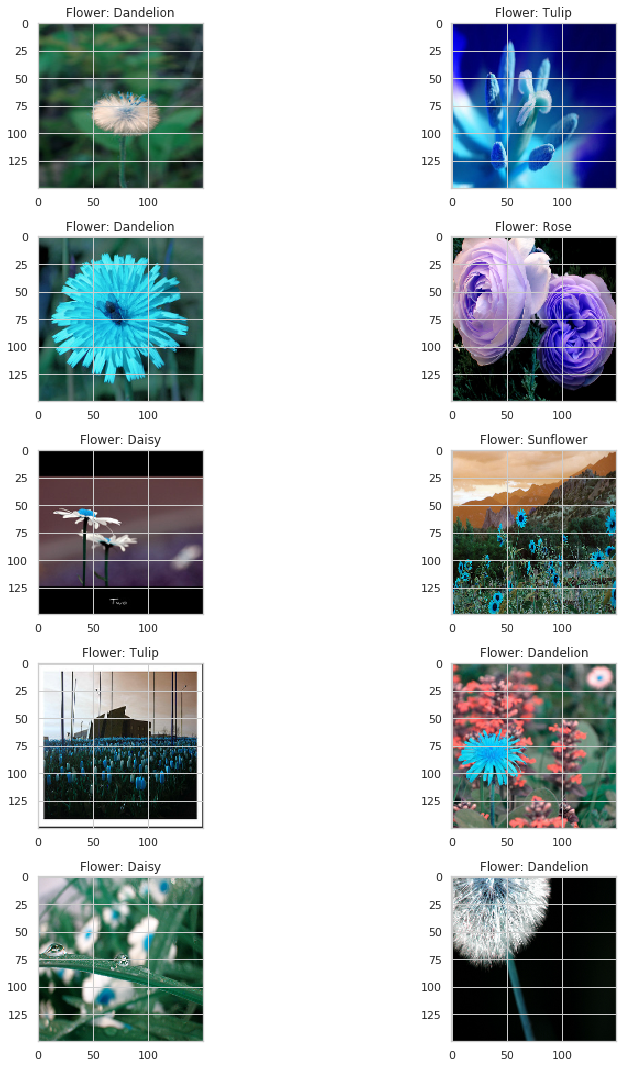

In [14]:
#create figure with 10 subplots 5 rows 2 cols
fig,ax=plt.subplots(5,2)
#set figures size
fig.set_size_inches(15,15)
#loop to show images rwos
for i in range(5):
    #loop for cols
    for j in range (2):
        #randomly select image
        l=rn.randint(0,len(Z))
        #show image
        ax[i,j].imshow(X[l])
        #set title
        ax[i,j].set_title('Flower: '+Z[l])
#layout of plot        
plt.tight_layout()

In [0]:
#encoding labels
le=LabelEncoder()
#put labels into y
Y=le.fit_transform(Z)
#make them to categories
Y=to_categorical(Y,5)
#setting up images into values
X=np.array(X)
#vectorizing images
X=X/255

In [0]:
#spltiing datasets 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [0]:
#set np seed
np.random.seed(42)
#set rn seed
rn.seed(42)
#set tf seed
tf.set_random_seed(42)

In [18]:
# modelling starts using a CNN.
model = Sequential()
#add convulsion layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add convulsion layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
#add convulsion layer
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#add convulsion layer
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#flatten matrix values
model.add(Flatten())
#dense layer
model.add(Dense(512))
#activation layer
model.add(Activation('relu'))
#softmax
model.add(Dense(5, activation = "softmax"))

W0625 18:46:44.562228 140642584885120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# modelling starts using a CNN.
model2 = Sequential()
#add convulsion layer
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
#add max pooling layer
model2.add(MaxPooling2D(pool_size=(2,2)))

#add convulsion layer
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#add max pooling layer
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
#add convulsion layer
model2.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#add max pooling layer
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#add convulsion layer
model2.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#add max pooling layer
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#flatten matrix values
model2.add(Flatten())
#dense layer
model2.add(Dense(512))
#activation layer
model2.add(Activation('relu'))
#softmax
model2.add(Dense(5, activation = "softmax"))

In [20]:
#batch size
batch_size=128
#number of epochs
epochs=50

#callback import
from keras.callbacks import ReduceLROnPlateau
#callback 
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

Using TensorFlow backend.


In [0]:
#data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range=0.2, # shear images
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#fitting images
datagen.fit(x_train)

In [22]:
#data augmentation
datagen1 = ImageDataGenerator(
        rescale = 1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        shear_range=0.2, # shear images
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

test_datagen1 = ImageDataGenerator(rescale=1./255)

#train generator for getting images and classes
train_generator = datagen1.flow_from_directory(train_dir,
                                             target_size = (IMG_SIZE,IMG_SIZE),
                                             color_mode='rgb',
                                             class_mode='categorical',
                                             shuffle = True)
#validation generator for getting images and classes
validation_generator = test_datagen1.flow_from_directory(validation_dir,
                                                           target_size=(IMG_SIZE,IMG_SIZE),
                                                           color_mode='rgb',
                                                           class_mode='categorical',
                                                           shuffle=True)


Found 750 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [23]:
#compile model
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
#summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [24]:
#compile model
model2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
#summary of model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 96)       

In [25]:
#history of model created fit generator and flow
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (x_test,y_test),
                              verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
21/21 [==============================] - 14s 651ms/step - loss: 1.5588 - acc: 0.3106 - val_loss: 1.3465 - val_acc: 0.4009
Epoch 2/50
21/21 [==============================] - 12s 559ms/step - loss: 1.2569 - acc: 0.4748 - val_loss: 1.1008 - val_acc: 0.5054
Epoch 3/50
21/21 [==============================] - 12s 566ms/step - loss: 1.1308 - acc: 0.5263 - val_loss: 1.0330 - val_acc: 0.5795
Epoch 4/50
21/21 [==============================] - 12s 575ms/step - loss: 1.0525 - acc: 0.5703 - val_loss: 0.9914 - val_acc: 0.6133
Epoch 5/50
21/21 [==============================] - 11s 546ms/step - loss: 0.9780 - acc: 0.6070 - val_loss: 0.9211 - val_acc: 0.6460
Epoch 6/50
21/21 [==============================] - 12s 567ms/step - loss: 0.9136 - acc: 0.6349 - val_loss: 0.9419 - val_acc: 0.6296
Epoch 7/50
21/21 [==============================] - 12s 561ms/step - loss: 0.8950 - acc: 0.6460 - val_loss: 0.8064 - val_acc: 0.6732
Epoch 8/50
21/21 [==============================] - 12s 583ms/step - 

In [26]:
#history of model created fit generator and flow from directory
step_size_train=train_generator.n//train_generator.batch_size
history1 = model2.fit_generator(generator = train_generator,
                              steps_per_epoch = step_size_train,
                              epochs=10,
                              validation_data = validation_generator,
                              validation_steps = 100 )

Epoch 1/10
23/23 [==============================] - 19s 815ms/step - loss: 1.5761 - acc: 0.2479 - val_loss: 1.3872 - val_acc: 0.4284
Epoch 2/10
23/23 [==============================] - 18s 791ms/step - loss: 1.3370 - acc: 0.4164 - val_loss: 1.4738 - val_acc: 0.3475
Epoch 3/10
23/23 [==============================] - 18s 781ms/step - loss: 1.2417 - acc: 0.4610 - val_loss: 1.1778 - val_acc: 0.5185
Epoch 4/10
23/23 [==============================] - 18s 770ms/step - loss: 1.2022 - acc: 0.4777 - val_loss: 1.1439 - val_acc: 0.5003
Epoch 5/10
23/23 [==============================] - 18s 772ms/step - loss: 1.1536 - acc: 0.5014 - val_loss: 1.3336 - val_acc: 0.4396
Epoch 6/10
23/23 [==============================] - 17s 754ms/step - loss: 1.1516 - acc: 0.5097 - val_loss: 1.1398 - val_acc: 0.5761
Epoch 7/10
23/23 [==============================] - 17s 752ms/step - loss: 1.1182 - acc: 0.5209 - val_loss: 1.1347 - val_acc: 0.5400
Epoch 8/10
23/23 [==============================] - 17s 734ms/step - 

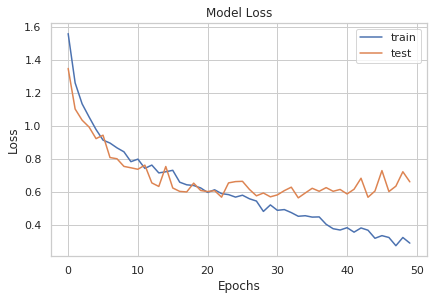

In [27]:
#plot loss 
plt.plot(History.history['loss'])
#plot val loss
plt.plot(History.history['val_loss'])
#title of plot
plt.title('Model Loss')
#y-label
plt.ylabel('Loss')
#x-label
plt.xlabel('Epochs')
#legend
plt.legend(['train', 'test'])
#show plot
plt.show()

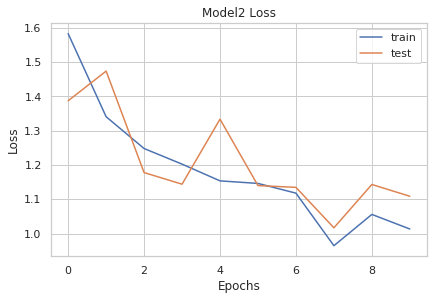

In [28]:
#plot loss 
plt.plot(history1.history['loss'])
#plot loss 
plt.plot(history1.history['val_loss'])
#title of plot
plt.title('Model2 Loss')
#y-label
plt.ylabel('Loss')
#x-label
plt.xlabel('Epochs')
#legend
plt.legend(['train', 'test'])
#show plot
plt.show()

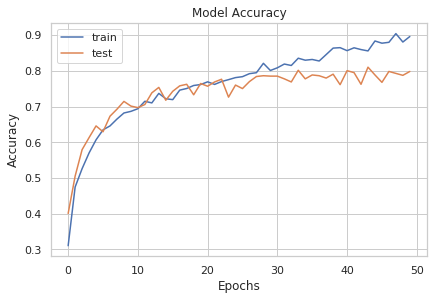

In [29]:
#plot accuracy
plt.plot(History.history['acc'])
#plot val accuracy
plt.plot(History.history['val_acc'])
#title of plot
plt.title('Model Accuracy')
#y label
plt.ylabel('Accuracy')
#x label
plt.xlabel('Epochs')
#legend
plt.legend(['train', 'test'])
#show plot
plt.show()

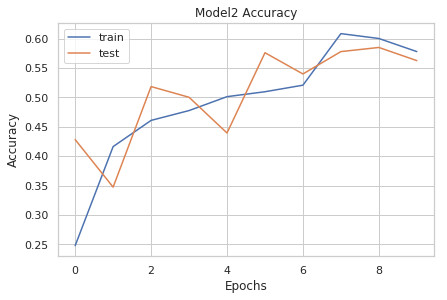

In [31]:
#plot accuracy
plt.plot(history1.history['acc'])
#plot accuracy
plt.plot(history1.history['val_acc'])
#title of plot
plt.title('Model2 Accuracy')
#y label
plt.ylabel('Accuracy')
#x label
plt.xlabel('Epochs')
#legend
plt.legend(['train', 'test'])
#show plot
plt.show()

In [0]:
# getting predictions on val set.
pred=model.predict(x_test)
#predicting digit from categories
pred_digits=np.argmax(pred,axis=1)

In [0]:
# getting predictions on val set.
pred1=model2.predict(x_test)
#predicting digit from categories
pred_digits1=np.argmax(pred1,axis=1)

In [0]:
# now storing some properly as well as misclassified indexes'.
#counter
i=0
#correct classification list
prop_class=[]
#incorrect classification list
mis_class=[]
#for loop to identify correct classified images
for i in range(len(y_test)):
    #label of image is prediction digit
    if(np.argmax(y_test[i])==pred_digits[i]):
        #add it to prop_class
        prop_class.append(i)
    #if prop_class lengeth is 8 break
    if(len(prop_class)==8):
        break
#counter
i=0
#for loop to identify incorrect classified images
for i in range(len(y_test)):
    #label of image is not prediction digit
    if(not np.argmax(y_test[i])==pred_digits[i]):
        #add it to mis_class
        mis_class.append(i)
    #if mis_class lengeth is 8 break
    if(len(mis_class)==8):
        break

In [0]:
# now storing some properly as well as misclassified indexes'.
#counter
i=0
#correct classification list
prop_class1=[]
#incorrect classification list
mis_class1=[]
#for loop to identify correct classified images
for i in range(len(y_test)):
    #label of image is prediction digit
    if(np.argmax(y_test[i])==pred_digits1[i]):
        #add it to prop_class
        prop_class1.append(i)
    #if prop_class lengeth is 8 break
    if(len(prop_class1)==8):
        break
#counter
i=0
#for loop to identify incorrect classified images
for i in range(len(y_test)):
    #label of image is not prediction digit
    if(not np.argmax(y_test[i])==pred_digits1[i]):
        #add it to mis_class
        mis_class1.append(i)
    #if mis_class lengeth is 8 break
    if(len(mis_class1)==8):
        break

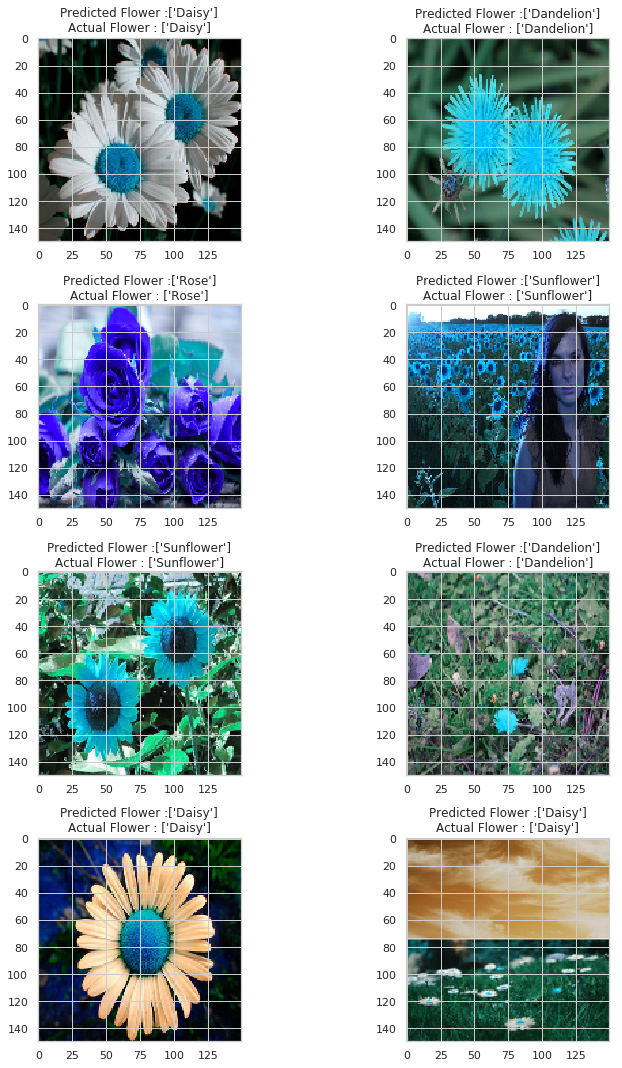

In [36]:
#warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
#count
count=0
#set up figure and subplots
fig,ax=plt.subplots(4,2)
#set up size of figure
fig.set_size_inches(15,15)
#loop 4 rows
for i in range (4):
  #loop 2 cols
    for j in range (2):
        #show correct image
        ax[i,j].imshow(x_test[prop_class[count]])
        #set title to predicted flower and actual flower
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        #layout of plot
        plt.tight_layout()
        #increment count
        count+=1

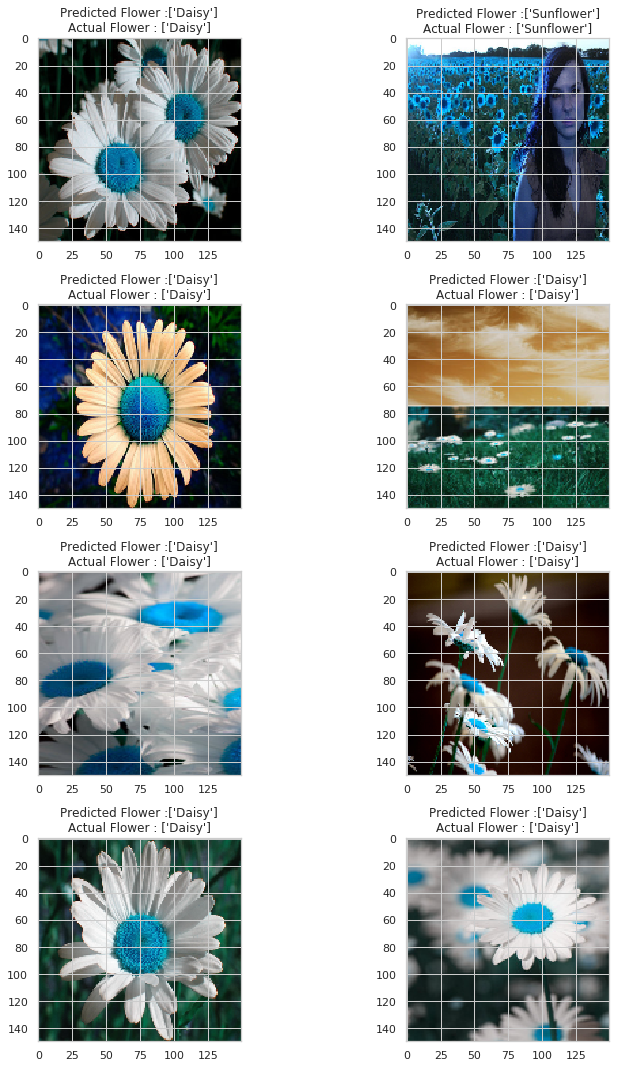

In [37]:
#warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
#count
count=0
#set up figure and subplots
fig,ax=plt.subplots(4,2)
#set up size of figure
fig.set_size_inches(15,15)
#loop 4 rows
for i in range (4):
  #loop 2 cols
    for j in range (2):
        #show correct image
        ax[i,j].imshow(x_test[prop_class1[count]])
        #set title to predicted flower and actual flower
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits1[prop_class1[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class1[count]])])))
        #layout of plot
        plt.tight_layout()
        #increment count
        count+=1

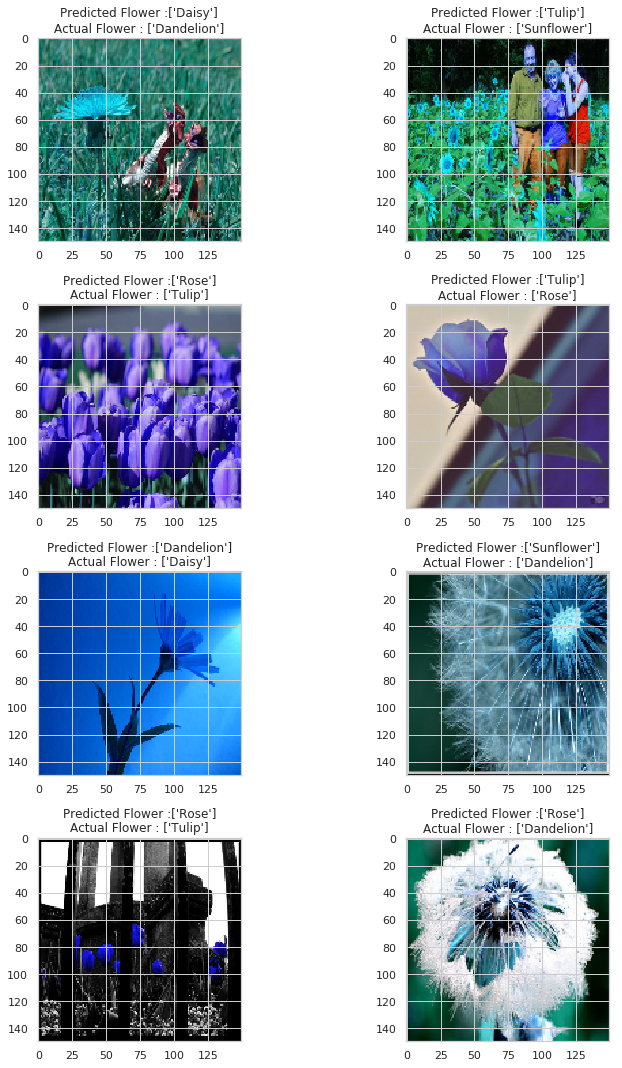

In [38]:
#warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
#count
count=0

#set up figure and subplots
fig,ax=plt.subplots(4,2)
#set up size of figure
fig.set_size_inches(15,15)
#loop 4 rows
for i in range (4):
    #loop two cols
    for j in range (2):
        #show incorrect images
        ax[i,j].imshow(x_test[mis_class[count]])
        #set title to predicted flower and actual flower 
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        #layout of plot
        plt.tight_layout()
        #increment count
        count+=1

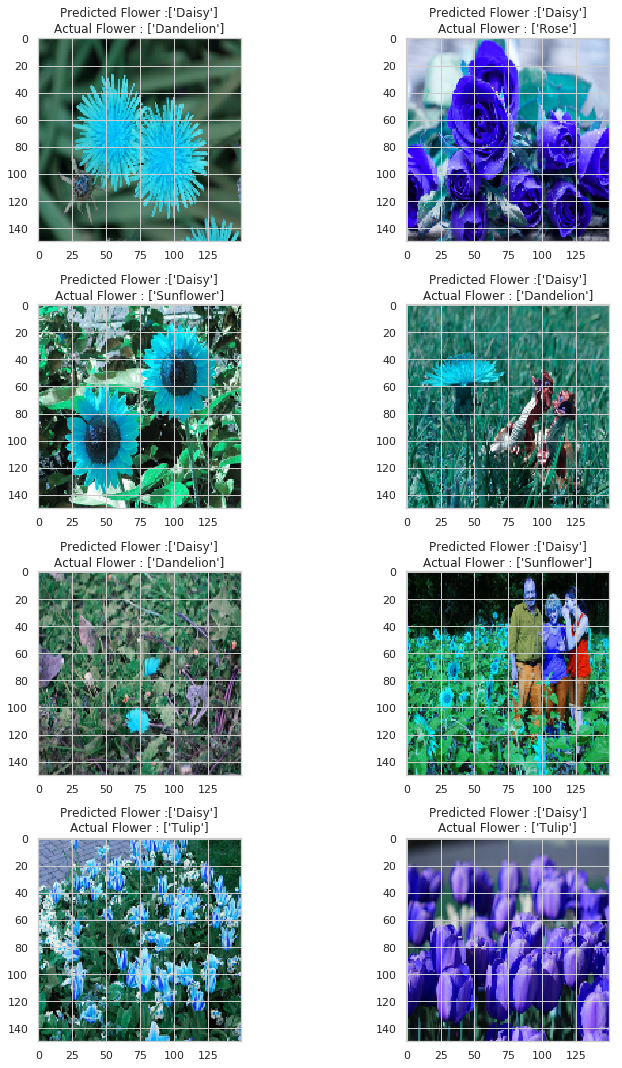

In [39]:
#warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
#count
count=0

#set up figure and subplots
fig,ax=plt.subplots(4,2)
#set up size of figure
fig.set_size_inches(15,15)
#loop 4 rows
for i in range (4):
    #loop two cols
    for j in range (2):
        #show incorrect images
        ax[i,j].imshow(x_test[mis_class1[count]])
        #set title to predicted flower and actual flower 
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits1[mis_class1[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class1[count]])])))
        #layout of plot
        plt.tight_layout()
        #increment count
        count+=1

In [0]:
#create model
def create_model_from_VGG19():
  #VGG model
  model = VGG19(weights = "imagenet", include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, 3))
  #make layers not trainable
  for layer in model.layers[:5]:
      #layers trainable false
      layer.trainable = False
  #model output
  x = model.output
  #flatten output
  x = Flatten()(x)
  #dense layer
  x = Dense(1024, activation = "relu")(x)
  #dropout
  x = Dropout(0.5)(x)
  #dense layer
  x = Dense(1024, activation = "relu")(x)
  #prediction from softmax
  prediction = Dense(5, activation = "softmax")(x)
    
  #finalize final model  
  final_model = Model(inputs = model.input, outputs = prediction)
  #compile final model
  final_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
  #return final model  
  return final_model

In [0]:
# #VGG19 model 
# modelV = VGG19(weights = "imagenet", include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, 3))
# #make layers not trainbable
# for layer in modelV.layers[:5]:
#   layer.trainable = False

# #layers of model 
# #output
# x = modelV.output
# #flatten the output layer
# x = Flatten()(x)
# #Dense layer
# x = Dense(1024, activation = "relu")(x)
# #dropout
# x = Dropout(0.5)(x)
# #dense layer
# x = Dense(1024, activation = "relu")(x)
# #prediction from softmax
# predictions = Dense(5, activation = "softmax")

# #finalize the model
# model_final = Model(inputs = modelV.input, outputs = predictions)
# #compile model
# model_final.compile(loss= "categorical_crossentropy", optimizer = SGD(lr=0.0001, momentum=0.9),metrics=['acc'])
# #model summary 
# model_final.summary()

In [90]:
#batch size
batch_size = 128
#number of epochs 
epochs2 = 10
#sample training
#nb_train_samples = 1000
#validation samples
#nb_validation_samples = 200

#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # rescale images
    fill_mode ="nearest", #nearest groupings
    rotation_range=40, # rotate images
    width_shift_range=0.4, # shift image width
    height_shift_range=0.4, # shift image height
    shear_range=0.2, # shear images
    zoom_range=0.3, # zoom images
    horizontal_flip=True #flip images horizontally 
)
#image vectorizations 
val_datagen = ImageDataGenerator(
  rescale=1./255 # rescale images
)
#train generator using flow
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (IMG_SIZE,IMG_SIZE),  
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode='categorical',
    shuffle = True
)
#validation generation using flow
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size = batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

# #fit model start training
# history = model_final.fit_generator(
#     train_generator,
#     samples_per_epoch = nb_train_samples,
#     epochs = epochs2,
#     validation_data=val_generator,
#     nb_val_samples = nb_validation_samples)

Found 750 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [0]:
#create VGG model
model_VGG19 = create_model_from_VGG19()
#model summary
model_VGG19.summary()

In [88]:
#step size train
step_size_train=train_generator.n//train_generator.batch_size
#model info using fit generator
model_VGG19_info = model_VGG19.fit_generator(
    generator = train_generator,
    steps_per_epoch = step_size_train,
    epochs = epochs2,
    validation_steps = 100,
    validation_data = val_generator,
    verbose = 1
)

Epoch 1/10
11/11 [==============================] - 34s 3s/step - loss: 1.6105 - acc: 0.1880 - val_loss: 1.6095 - val_acc: 0.2004
Epoch 2/10
11/11 [==============================] - 34s 3s/step - loss: 1.6099 - acc: 0.2031 - val_loss: 1.6095 - val_acc: 0.2000
Epoch 3/10
11/11 [==============================] - 34s 3s/step - loss: 1.6102 - acc: 0.1781 - val_loss: 1.6096 - val_acc: 0.1993
Epoch 4/10
11/11 [==============================] - 34s 3s/step - loss: 1.6100 - acc: 0.1861 - val_loss: 1.6095 - val_acc: 0.1996
Epoch 5/10
11/11 [==============================] - 34s 3s/step - loss: 1.6098 - acc: 0.1781 - val_loss: 1.6095 - val_acc: 0.1987
Epoch 6/10
11/11 [==============================] - 34s 3s/step - loss: 1.6100 - acc: 0.1747 - val_loss: 1.6095 - val_acc: 0.2001
Epoch 7/10
11/11 [==============================] - 33s 3s/step - loss: 1.6100 - acc: 0.1487 - val_loss: 1.6095 - val_acc: 0.2006
Epoch 8/10
11/11 [==============================] - 33s 3s/step - loss: 1.6098 - acc: 0.17

In [0]:
#function to plot VGG19 history
def plot_model_history(model_name, history, epochs):
  #print model name
  print(model_name)
  #figure size
  plt.figure(figsize=(15,5))
  #subplots  1
  plt.subplot(1,2,1)
  #plot accuracy
  plt.plot(np.arange(0, len(history['acc'])), history['acc'], 'r')
  #plot val accuracy
  plt.plot(np.arange(1, len(history['val_acc'])+1), history['val_acc'], 'g')
  #xticks
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  #title
  plt.title('Training Accuracy vs. Validation Accuracy')
  #x label
  plt.xlabel('Num of Epochs')
  #y label
  plt.ylabel('Accuracy')
  #lgend
  plt.legend(['train' , 'validation'], loc = 'best')
  
  #subplot 2
  plt.subplot(1,2,2)
  #plot loss
  plt.plot(np.arange(1, len(history['loss'])+1), history['loss'], 'r')
  #plot val loss
  plt.plot(np.arange(1, len(history['val_loss'])+1), history['val_loss'], 'g')
  #x ticks
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  #title
  plt.title('Training Loss vs. Validation Loss')
  #x label
  plt.xlabel('Num of Epochs')
  #y label
  plt.ylabel('Loss')
  #legend
  plt.legend(['train', 'validation'], loc = 'best')
  #show plot
  plt.show()

In [0]:
#plot model history for VGG19
plot_model_history('model_VGG19', model_final.history, epochs2)